In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import baltic as bt
import matplotlib.patheffects as path_effects
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
import matplotlib.colors as clr
from matplotlib import rc
import textwrap as textwrap
from textwrap import wrap

import numpy as np
import pandas as pd

mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rc('text', usetex='false')
mpl.rcParams.update({'font.size': 22})


In [2]:
ll=bt.loadNexus("flyway.mcc.tree",tip_regex='\|([0-9]+\-[0-9]+\-[0-9]+)') ## treeFile here can alternatively be a path to a local file
ll.treeStats() ## report stats about tree


Tree height: 2.736312
Tree length: 227.009416
strictly bifurcating tree
annotations present

Numbers of objects in tree: 1999 (999 nodes and 1000 leaves)



In [3]:
def plot_tree_colored_nodes(tree, filename, traitName, color_list, metadata_translations):
    # originally did width of 8, changed to 16
    fig,ax = plt.subplots(figsize=(12,12),facecolor='w')

    # # this sets the vertical dashed lines on the tree; plot a dashed line every other year from 1990 to 2020
    dates_ls = []
    for i in range(2020,2023,1):
        dates_ls.append(i)  
    #dates = dates_ls[::2]
    #[ax.axvline(i,ls='--',lw=2,color='grey',zorder=0, alpha=0.6) for i in dates]

    # set date labels to be every 4
    # date_labels = []
    # for d in dates_ls[::4]:
    #     date_labels.append(str(d))
    #     if d < 2018:
    #         date_labels.append("")

    branchWidth=1 ## default branch width
    tipSize = 15

    # k objects are tips, nodes, branches
    for k in tree.Objects: ## iterate over objects in tree
        x=k.absoluteTime ## or use absolute time instead
        y=k.y 

        xp=k.parent.absoluteTime ## get x position of current object's parent
        if x==None: ## matplotlib won't plot Nones, like root
            x=0.0
        if xp==None:
            xp=x

        if isinstance(k,bt.leaf) or k.branchType=='leaf': ## if leaf...
            if traitName == "domwildbyb":
                traitValue = metadata_translations[k.traits[traitName]]
            else: 
                traitValue = k.traits[traitName]
            
            traitProb = k.traits[traitName+".prob"]
            base_color=colors[traitValue]
            color_ramp = clr.LinearSegmentedColormap.from_list('custom ', ["#B9B9B9",base_color], N=256)
            c = color_ramp(traitProb)
            s=tipSize

            ax.scatter(x,y,s=s,facecolor=c,edgecolor='none',zorder=11) ## plot circle for every tip
            ax.scatter(x,y,s=s+0.8*s,facecolor='k',edgecolor='none',zorder=10) ## plot black circle underneath

        elif isinstance(k,bt.node) or k.branchType=='node': ## if node...
            number_children = len(k.leaves)
            node_branchwidth = branchWidth + number_children*0.005
            
            if traitName == "domwildbyb":
                traitValue = metadata_translations[k.traits[traitName]]
            else: 
                traitValue = k.traits[traitName]

            traitProb = k.traits[traitName+".prob"]
            base_color=colors[traitValue]
            color_ramp = clr.LinearSegmentedColormap.from_list('custom ', ["#B9B9B9", base_color], N=256)
            c = color_ramp(traitProb)
            ax.plot([x,x],[k.children[-1].y,k.children[0].y],lw=node_branchwidth,color=c,ls='-',zorder=9) #color=node_colors[node_types[k]["node_community_status"]]

        ax.plot([xp,x],[y,y],lw=node_branchwidth,color=c,ls='-',zorder=9)

        # add in a legend
        han_list = []

        # bbox to anchor puts a bounding box around where you want the legend to go, prop part is for text size
    for key in color_list:
        marker = mlines.Line2D(range(1), range(1), color = colors[key], marker='o', markerfacecolor = colors[key], label = key.replace("_"," ").title().replace("nonhuman_mammal","Nonhuman Mammal").replace("Nonhuman-Mammal","Nonhuman\nMammal").replace("bird","Bird").replace("Partially Migratory","Partially\nMigratory"), markersize = 10, markeredgewidth=2)
        han_list.append(marker)

    # set axis limits, remove border lines         
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)

    ax.set_ylim(-5,tree.ySpan+5)
    ax.set_xlim(2020.5,2023.9)
    ax.tick_params(axis='y',labelsize=0,size=0)
    ax.tick_params(axis='x',labelsize=24,size=5, width=2,color='grey')
    #ax.set_xticks(dates_ls)
    #ax.set_xticklabels(dates_ls)   # set date labels every 4
    ax.set_yticklabels([])

    # in order to get the legend to plot without being transparent, over the plot, it needs to be here with frame set to true
    # bbox arguments are: x, y, with 0 being furthest left and bottom
    ax.legend(handles = han_list, markerfirst = True, edgecolor="white", framealpha=1, loc='best', bbox_to_anchor=(0.25, 0.2, 0.1, 0.1),prop={'size':15}, facecolor='w')

    fig.tight_layout()
    plt.gcf().subplots_adjust(right=0.88)
    plt.savefig(filename)

    plt.show()

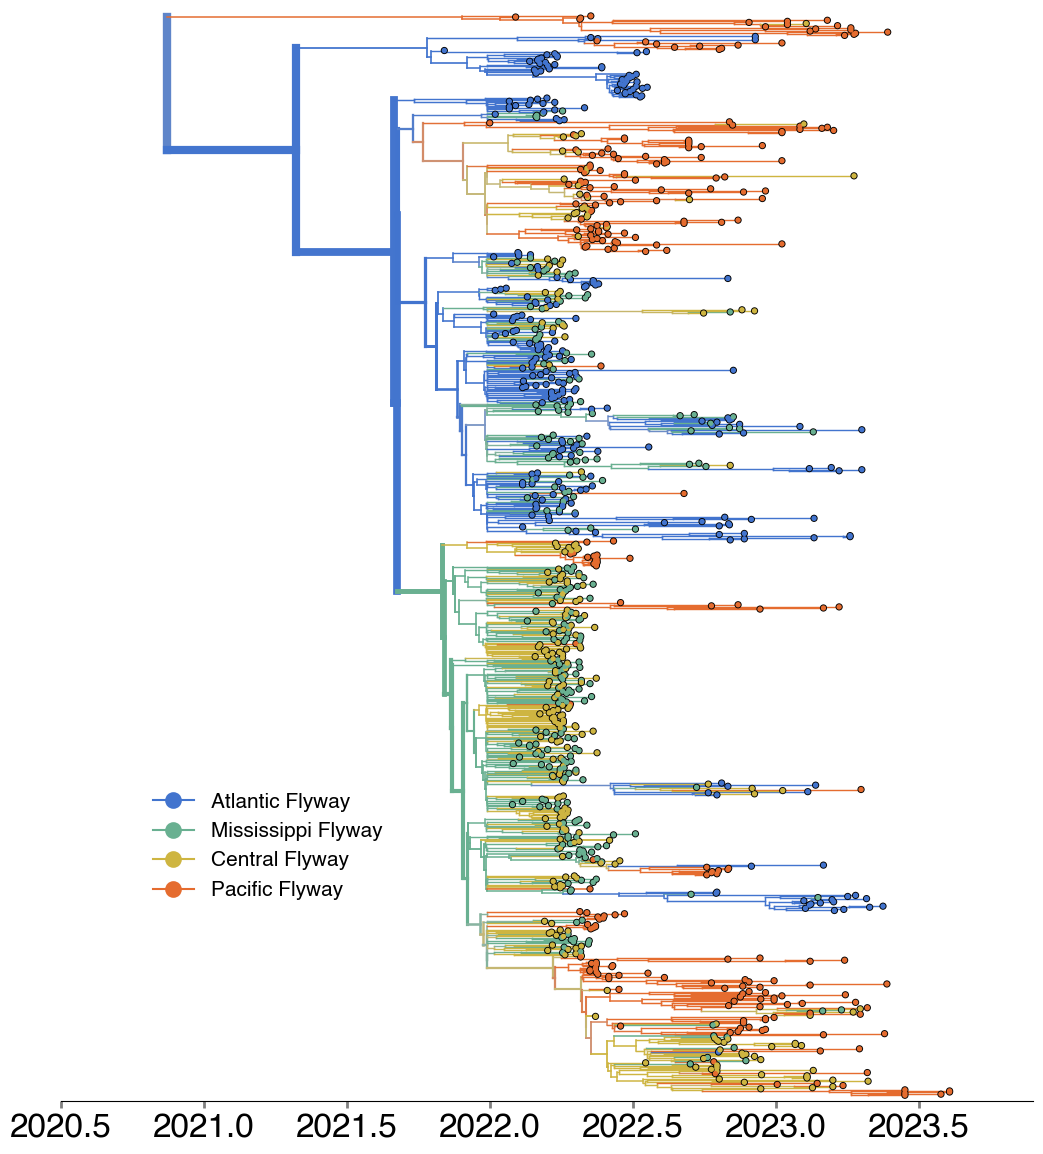

In [4]:
# for plotting orders
colors = {"atlantic_flyway":"#4274CE",
"pacific_flyway":"#E56C2F" ,
"central_flyway":"#CEB541" ,
"mississippi_flyway":"#69B091"
         }

uncertainty_color:"#B9B9B9"

color_order_flyway = ["atlantic_flyway","mississippi_flyway","central_flyway","pacific_flyway"]


metadata_translations = {
    "atlantic_flyway": "atlantic_flyway",
    "mississippi_flyway": "mississippi_flyway",
    "central_flyway": "central_flyway",
    "pacific_flyway": "pacific_flyway",
} 

# set output filename
traitName = "flyway.states"
color_list = color_order_flyway
filename = "h5nx-ordereq-flyway_newcol3.pdf"

plot_tree_colored_nodes(ll, filename, traitName, color_list, metadata_translations)